/home/romuald/ENSEIGNEMENT/1-JupyterNotebooks/pyPhysChem/ImageProcessing



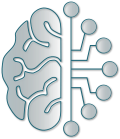

**Start at:** Thursday 02 October 2025, 22:07:23  
**Hostname:** device-8.home (Linux)

<p style="text-align: center"><img width="800px" src="../config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = '../config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)

import tools4pyPhysChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

__author__ = "Simon Cayez, LPCNO / Département Génie Physique (INSA Toulouse, France)"

<h2 style="text-align: center;">
  <b><u>Dataset Preparation</u>:<br>
  Step 2 – Full Dataset Assembly and CNN Training</b>
</h2>


<div class="intro">
    
In the previous notebook, we processed the images for each shape separately, preparing them for deep learning.  
In this notebook, we will **aggregate the three classes** (`circle`, `triangle`, `square`) into a single dataset, **assign labels**, **shuffle and normalize** the data, and **split it into training and test sets**.  

Finally, we will **train a 2D CNN** on this dataset and **make predictions**.  
This notebook continues directly from the previous one: [Step 1 – Image Processing](image_processing_workshop.ipynb).  

Or download [preprocess numpy data](https://drive.google.com/drive/folders/1K_GZnZvr9dbCMc8GtGkxUprQGn78BOGo?usp=sharing)

</div>

## 1- Create Numpy array datasets with all geometries

### 1-1- Images array (X)

#### 1-1-1- Load images

<div class="app">
    
- Load the preprocessed images for each shape as NumPy arrays and check their dimensions. Use `np.load`
</div>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

import numpy as np
import os

base_dir = 'data/'

path_circle = os.path.join(base_dir,"circle_data_preprocess.npy")
path_square = os.path.join(base_dir,"square_data_preprocess.npy")
path_triangle = os.path.join(base_dir,"triangle_data_preprocess.npy")


circle = np.load(path_circle)
square = np.load(path_square)    
triangle = np.load(path_triangle)

print(circle.shape)
print(square.shape)
print(triangle.shape)

```
</details>

#### 1-1-2- Concatenate arrays

<div class="app">
    
**concatenate** the three image arrays (`circle`, `square`, `triangle`) along the first axis to combine them into a single dataset `X`.

- Before concatenation:  
  - `circle` : shape `(a, 128, 128)`  
  - `square` : shape `(b, 128, 128)`  
  - `triangle`: shape `(c, 128, 128)`  

- After concatenation:  
  - `X` : shape `(a+b+c, 128, 128)`  

This combined array `X` now contains **all images from the three classes** in one single dataset.
</div>

- Concatenate numpy arrays

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

X = np.concatenate([circle, square, triangle], axis=0) 
print(X.shape)

```
</details>

#### 1-2- Labels array (y)

#### 1-2-1- Create labels arrays

<div class="app">

Create the **labels** for each image set.  
In a classification problem, a **label** is a numeric value representing the class of each sample.  

- All circle images are assigned the label `0`  
- All square images are assigned the label `1`  
- All triangle images are assigned the label `2`  
 **create the corresponding labels** for each shape.  
For this, we build three NumPy arrays:  

- One filled with `0` for circles (`len(circle)` elements)  
- One filled with `1` for squares (`len(square)` elements)  
- One filled with `2` for triangles (`len(triangle)` elements)  

These arrays give each image its **class label** (circle, square, triangle) and will be combined with the image data in the next step.
</div>

- Define 3 numpy arrays for circle , square and triangles labels

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

y_circle = np.zeros(len(circle), dtype=int)           # classe 0
y_square = np.ones(len(square), dtype=int)            # class 1
y_triangle = np.full(len(triangle), 2, dtype=int) 

print(y_circle.shape)
print(y_square.shape)
print(y_triangle.shape)

```
</details>

#### 1-1-2- Concatenate arrays

<div class="app">
    
**concatenate** the three label arrays (`y_circle`, `y_square`, `y_triangle`) into a single array `y` using `np.concatenate`.  

- Before concatenation, we had three separate 1-D arrays of shapes `(a,)`, `(b,)`, and `(c,)`.  
- After concatenation, we obtain a single 1-D array of shape `(a+b+c,)`, which contains the labels for **all images combined** (circles, squares, and triangles).  

The variable name `y` is the **convention in machine learning** again, to denote the array of **labels/targets** corresponding to the input data `X`.
We name the combined image array **`X`** because, by convention in machine learning, `X` represents the **input data** (features) fed into a model.  
</div>

- Concatenate y arrays

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

y = np.concatenate([y_circle, y_square, y_triangle], axis=0)
print(y.shape)

```
</details>

<div class="rqE">
    
Now the NumPy arrays are prepared. We have:

- A **stack of images**:
  - The first *a* images are **circles**  
  - The next *b* images are **squares**  
  - The following *c* images are **triangles**

- And a **label array**:
  - The first *a* values are **0**  
  - The next *b* values are **1**  
  - The following *c* values are **2**  

Keep in mind the correspondence between labels and classes:

- **0 = circle**  
- **1 = square**  
- **2 = triangle**
</div>

### 1-3- Dataset overview

<div class="app">

To get an overview of the dataset, we can create a video of the image sequence and overlay a small shape on each frame to indicate its label.  
This is done with the function `create_video_from_images_with_labels`.  

For the shapes, we use OpenCV drawing functions:  
- `cv2.circle` for circles  
- `cv2.rectangle` for squares  
- `cv2.fillPoly` for triangles  
</div>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

import cv2
def create_video_from_images_with_labels(images, labels, output_path='output_video.mp4', fps=5):
    """
    Create a video from grayscale images with a small shape drawn according to the label.

    Parameters
    ----------
    images : np.ndarray of shape (n_images, height, width)
        Grayscale images.
    labels : np.ndarray of shape (n_images,)
        Labels (0=circle, 1=square, 2=triangle).
    output_path : str
        Path to save the video file.
    fps : int
        Frames per second (speed of the video).
    """
    n_images, height, width = images.shape

    # Video writer in color (3 channels)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height), isColor=True)

    print(f"Creating video with {n_images} frames at {fps} FPS...")

    for i in range(n_images):
        current_image = images[i].astype(np.float32)

        # Normalize to 0-255 and convert to uint8
        img_normalized = cv2.normalize(current_image, None, 0, 255, cv2.NORM_MINMAX)
        img_uint8 = img_normalized.astype(np.uint8)

        # Convert grayscale to BGR for color drawing
        img_color = cv2.cvtColor(img_uint8, cv2.COLOR_GRAY2BGR)

        # Coordinates for annotation (top right corner)
        x, y = width - 20, 20  # top-right corner

        # Choose shape and draw it in yellow (BGR=(0,255,255))
        if labels[i] == 0:  # circle
            cv2.circle(img_color, (x, y), 8, (0, 255, 255), -1)
        elif labels[i] == 1:  # square
            cv2.rectangle(img_color, (x - 10, y - 10), (x + 10, y + 10), (0, 255, 255), -1)
        elif labels[i] == 2:  # triangle
            pts = np.array([[x, y - 10], [x - 10, y + 10], [x + 10, y + 10]], np.int32)
            pts = pts.reshape((-1, 1, 2))
            cv2.fillPoly(img_color, [pts], (0, 255, 255))

        # Write frame
        out.write(img_color)

        if (i + 1) % 5 == 0 or i == 0 or i == n_images - 1:
            print(f"Processed frame {i+1}/{n_images}")

    out.release()
    print(f"Video saved as {output_path}")
    print(f"Video dimensions: {width}x{height}, Duration: {n_images/fps:.1f} s")

create_video_from_images_with_labels(X, y, output_path='data/video_shuffleXy.mp4', fps=5)

```
</details>

## 2- Prepare dataset for building Keras Tensorflow model

### 2-1- Add a Channel Dimension

<div class="app">

Our current data array `X` has the shape `(n_samples, 128, 128)`, which represents  
`n_samples` grayscale images of size `128 × 128`.

However, most **Keras/TensorFlow CNN layers** expect an input shape of  
`(n_samples, height, width, channels)` — the last dimension corresponds to the number of channels  
(e.g. `3` for RGB images, `1` for grayscale).

In short, we will have to pass from `(n_samples, 128, 128)` to `(n_samples, 128, 128, 1)`


To make our grayscale images compatible with CNNs, we need to **add a channel dimension** equal to `1`.  
We can do this with:
</div>

- Add an axis 

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

print(X.shape)
X = X[:, :, :, np.newaxis]
print(X.shape)

```
</details>

### 2-2- Shuffle data

<div class="intro">

Shuffling randomly mixes samples so that the order of data (e.g., all circles first, then all squares, then all triangles) does not bias the training process.  
This ensures that batches fed to the model are representative of all classes and helps the model learn better.
</div>


#### 2-2-1- Set random seeds

<div class="intro">

Setting seeds (for NumPy, Python’s `random`, TensorFlow, etc.) forces all random operations to produce the same sequence of random numbers each time you run the script.  
this makes your data preparation and model training **reproducible** — you’ll get the same shuffled dataset and the same initial weights at every run.
</div>

In [ ]:
import os
os.environ['PYTHONHASHSEED'] = '42'   
import random
import tensorflow as tf

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#### 2-2-2- Apply Shuffle

<div class="app">
    
Now use `sklearn.utils.shuffle` to randomly reorder `X` and `y` **in the same way** so that the correspondence between images and labels is preserved:
</div>

- Shuffle dataset

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=seed)
print(y)

```
</details>

### 2-3- Split Dataset into Training and Test Sets  

<div class="app">

After shuffling, we split our dataset into **training** and **test** sets.  
- The **training set** is used to train the CNN.  
- The **test set** is used to evaluate its performance on unseen data.  

We use `train_test_split` from `sklearn.model_selection`, with the following considerations:  
- `test_size=0.2` → 20% of the data is reserved for testing.  
- `random_state=seed` → ensures reproducibility.  
- `stratify=y` → preserves the class proportions in both training and test sets.

Split dataset in train and test sets
</div>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

from sklearn.model_selection import train_test_split

#Assume X and y are already built
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         # 20% en test
    random_state=seed,       # pour reproductibilité
    stratify=y             # pour garder la proportion des classes
)

print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set:     X_test  = {X_test.shape}, y_test  = {y_test.shape}")

```
</details>

## 3- Convolutional Neural Network (CNN)

### 3-1 — Create a 2D CNN Model

<div class="app">
    
Now that the dataset is ready, we can define a **2D CNN** for classifying our images into three classes: circle, square, or triangle.  

Create you CNN2D Mode

</div>


<details>
<summary>🐢⏳ I'm stuck...</summary>

An example of model could uses the following layers:

1. **Conv2D + ReLU** → Extracts spatial features from the images.  
2. **MaxPooling2D** → Reduces spatial dimensions while keeping important features.  
3. **Another Conv2D + ReLU** → Learns more complex patterns.  
4. **MaxPooling2D** → Further reduces feature map size.  
5. **Flatten** → Converts 2D feature maps into a 1D vector for the dense layers.  
6. **Dense (64, ReLU)** → Fully connected layer to combine features.  
7. **Dense (3, softmax)** → Output layer with 3 neurons for our 3 classes.  

We compile the model using:  
- **Optimizer:** `adam`  
- **Loss function:** `sparse_categorical_crossentropy` (because our labels are integer-encoded)  
- **Metric:** `accuracy` to monitor performance during training.  
</details>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(X.shape[1],X.shape[2],X.shape[3])),
    #layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


```
</details>

### 3-2- Train model

<div class="app">

**Training a model** means adjusting its internal parameters (weights and biases) so that it can learn to map input data (`X_train`) to the correct output labels (`y_train`).  
During training, the model makes predictions on the input data, computes the error (loss) compared to the true labels, and updates its parameters using an optimization algorithm (here, **Adam**) to minimize this error.

- **`X_train` and `y_train`**: the input images and their corresponding labels for training.  
- **`epochs=20`**: the model will iterate 20 times over the entire training dataset.  
- **`batch_size=64`**: the number of samples processed before the model updates its weights.  
- **`validation_split=0.2`**: 20% of the training data is held out for validation to monitor performance during training.  
- **`verbose=1`**: print progress and metrics for each epoch.

The function returns a `history` object that stores the evolution of training and validation metrics over epochs, which can be used later for plotting learning curves.
</div>

- Train the model

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

history = model.fit(
    X_train, y_train,          
    epochs=20,                
    batch_size=64,            
    validation_split=0.2,      
    verbose=1                 
)

```
</details>

### 3-3- Evaluate model performances

#### 3-3-1- Plot metrics

<div class="intro">

After training, we can **visualize how the model’s performance evolved** over epochs.  
Here, we plot the **training accuracy** and **validation accuracy** for each epoch.  

- **Training accuracy** shows how well the model fits the training data.  
- **Validation accuracy** shows how well the model generalizes to unseen data (here, a fraction of the training set held out for validation).  

By comparing the two curves, we can detect **overfitting** (training accuracy much higher than validation) or **underfitting** (both accuracies low).

</div>


<div class="app">

Plot history of accuracy on train and validation
</div>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

```
</details>

#### 3-3-2- Predictions on test dataset

##### 3-3-3-2- Compute prediction

<div class="app">

Now that the model is trained, we can **make predictions on the test set**.  
We will compute the predicted class for each test image by taking the class with the highest probability.  

Predict probility and find class for X_test
</div>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

y_pred_proba = model.predict(X_test)              # probability for each class (nb_images, 3)
y_pred = np.argmax(y_pred_proba, axis=1)          # predicted class (0 or 1 or 2)

```
</details>

<div class="app">

After predicting on the test set, `y_pred_proba` contains the **predicted probabilities for each class** for every image, while `y_pred` contains the **predicted class** based on the maximum probability.
For example, for the first 5 images:
</div>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

# Probabilities for each class
print("Predicted probabilities for the first 5 test images:")
for i, probs in enumerate(y_pred_proba[:5]):
    print(f"Image {i}: {probs}")

# Predicted class
print("\nPredicted classes for the first 5 test images:")
for i, pred in enumerate(y_pred[:5]):
    print(f"Image {i}: class {pred}")

```
</details>

#### 3-3-3- Accuracy and confusion matrix

##### 3-3-3-1 — Compute Test Accuracy

<div class="app">

Once we have the predicted classes (`y_pred`) for the test set, we can measure how well our CNN performs using the **accuracy score**.

Find accuracy score on test set

</div>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

from sklearn.metrics import accuracy_score
# --- accuracy ---
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {acc:.3f}")
print(f"Meaning: {100*acc:.1f}% of the predictions are correct")

```
</details>


##### 3-3-3-1- Confusion matrix

<div class="app">

A **confusion matrix** is a table that summarizes the performance of a classification model by comparing the **true labels** `(y_test)` with the **predicted labels** `(y_pred)`.

Print confusion matrix

</div>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)

```
</details>

<div class="app">
    
We can visualize the confusion matrix as a **heatmap** to make it easier to interpret the model's performance.

- Each **cell** shows the number of samples with a given true label (row) predicted as a given class (column).  
- The **diagonal** shows the correctly classified samples.  
- The **off-diagonal** shows misclassifications.  
- Using colors (Blues) allows us to quickly see which classes are predicted well (darker = more samples).  

The x-axis represents the **predicted classes**, the y-axis the **true classes**.  
The **accuracy** of the model is also displayed in the title for quick reference.

Plot confusion matrix

</div>

In [ ]:
# YOUR CODE HERE

<details>
<summary>💡 Solution</summary>

```python

import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['circle','square','triangle'],
            yticklabels=['circle','square','triangle'])
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title(f'Confusion Matrix (Accuracy {acc:.2%})')
plt.tight_layout()
plt.show();

```
</details>


<div class="rqE">

We have now completed the full workflow: from raw files to image processing, dataset preparation, model definition, training, and evaluation. But the process is never really finished — you can always aim for better accuracy or improved generalization of your model. Why not try to improve it, for example by:


- Compare **raw vs preprocessed** input: Train the *same* CNN on the raw images (or raw but resized to 128×128 to keep time reasonable).  

- Data augmentation 

    - Intensity: multiply image by factor in `[0.8, 1.2]` or apply random gamma `gamma ∈ [0.8,1.2]`.  
    - Add noise: small Gaussian noise  or Poisson noise .  
    - Contrast adjustments: small contrast scaling    
    - Small blur / smoothing: Gaussian blur.  
    - Small translations: This simulates small misalignments.  
    - Random detector artifacts: occasional dead pixels or small bright spots to simulate detector defects.
    - ...
  

- Network architecture experiments
    - Increase depth: add one or two conv blocks (Conv → BN → ReLU → MaxPool).  
    - Use BatchNorm after convs for stability.  
    - Add Dropout (e.g. `0.25–0.5`) before dense layers to reduce overfitting.  
    - Change kernel sizes: try `3×3` vs `5×5` (SAXS spots are extended; larger kernels can capture broader features).  
    - ...

- Training & regularization tips
    - Use `EarlyStopping(monitor='val_loss', patience=5)` and `ReduceLROnPlateau`.  
    - Try `optimizer=Adam(learning_rate=1e-3)` then lower LR (`1e-4`) for fine tuning.  
    - Change `batch_size=32` .
    - ...

</div>

In [ ]:
vID.end(cwd0)